#Dataset


In [ ]:
import zipfile
import os

def unzip_file(zip_path, extract_to="."):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Files extracted to: {extract_to}")


In [ ]:
# Path to the zip file
zip_path = "/content/Tubessssssssss.zip"

# Directory where images will be extracted
extract_dir = "/content/Tubessssssssss"

# Unzip the file
unzip_file(zip_path, extract_dir)

Files extracted to: /content/Tubessssssssss


#Pre Processing


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras import metrics
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Membuat klasifikasi jenis penyakit

In [ ]:
# Process image (input) for the model
def process(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = tf.keras.applications.mobilenet.preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

# Read image
def get_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Visualize samples
def visualize_samples(datagen, row_col_len=4, figsize=None):
    random_indexes = np.random.randint(0, len(datagen.labels), row_col_len**2)

    classes = np.array(list(datagen.class_indices))
    labels = classes[np.array(datagen.labels)[random_indexes]]
    filepaths = pd.Series(datagen.filenames)[random_indexes]
    filepaths = "/content/Tubessssssssss/" + filepaths
    images = filepaths.apply(get_image).reset_index(drop=True)

    figsize = figsize or np.array((row_col_len, row_col_len)) * 4
    fig, ax = plt.subplots(row_col_len, row_col_len, figsize=figsize)

    for i in range(row_col_len):
        for j in range(row_col_len):
            sample_index = i * row_col_len + j
            ax[i,j].imshow(images[sample_index])
            ax[i,j].set_title(labels[sample_index])
            ax[i,j].set_axis_off()

    plt.show()

#Image Data Generator

##Stratified Splitting

In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Path ke direktori dataset asli
original_dataset_dir = '/content/Tubessssssssss'

# Path untuk direktori output train, validation, dan test
base_dir = '/content/split_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Membuat direktori baru
if not os.path.exists(base_dir):
    os.makedirs(train_dir)
    os.makedirs(validation_dir)
    os.makedirs(test_dir)

# Membaca data dan label
data = []
labels = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            data.append(img_path)
            labels.append(class_name)

# Splitting data: 60% train, 20% validation, 20% test
# Split pertama untuk mendapatkan data training
train_data, temp_data, train_labels, temp_labels = train_test_split(
    data, labels, test_size=0.4, stratify=labels, random_state=42
)

# Split kedua untuk membagi sisa data menjadi validation dan test
validation_data, test_data, validation_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)

# Fungsi untuk menyalin file
def copy_files(data, labels, target_dir):
    for img_path, label in zip(data, labels):
        label_dir = os.path.join(target_dir, label)
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        shutil.copy(img_path, label_dir)

# Menyalin data ke folder baru
copy_files(train_data, train_labels, train_dir)
copy_files(validation_data, validation_labels, validation_dir)
copy_files(test_data, test_labels, test_dir)

print(f"Data train tersimpan di: {train_dir}")
print(f"Data validation tersimpan di: {validation_dir}")
print(f"Data test tersimpan di: {test_dir}")

Data train tersimpan di: /content/split_data/train
Data validation tersimpan di: /content/split_data/validation
Data test tersimpan di: /content/split_data/test


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

In [ ]:
train_gen_flow = train_datagen.flow_from_directory(
    directory='/content/split_data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

valid_gen_flow = validation_datagen.flow_from_directory(
    directory='/content/split_data/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_gen_flow = test_datagen.flow_from_directory(
    directory='/content/split_data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 452 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 151 images belonging to 3 classes.


#Visualisasi Sampel Data Training

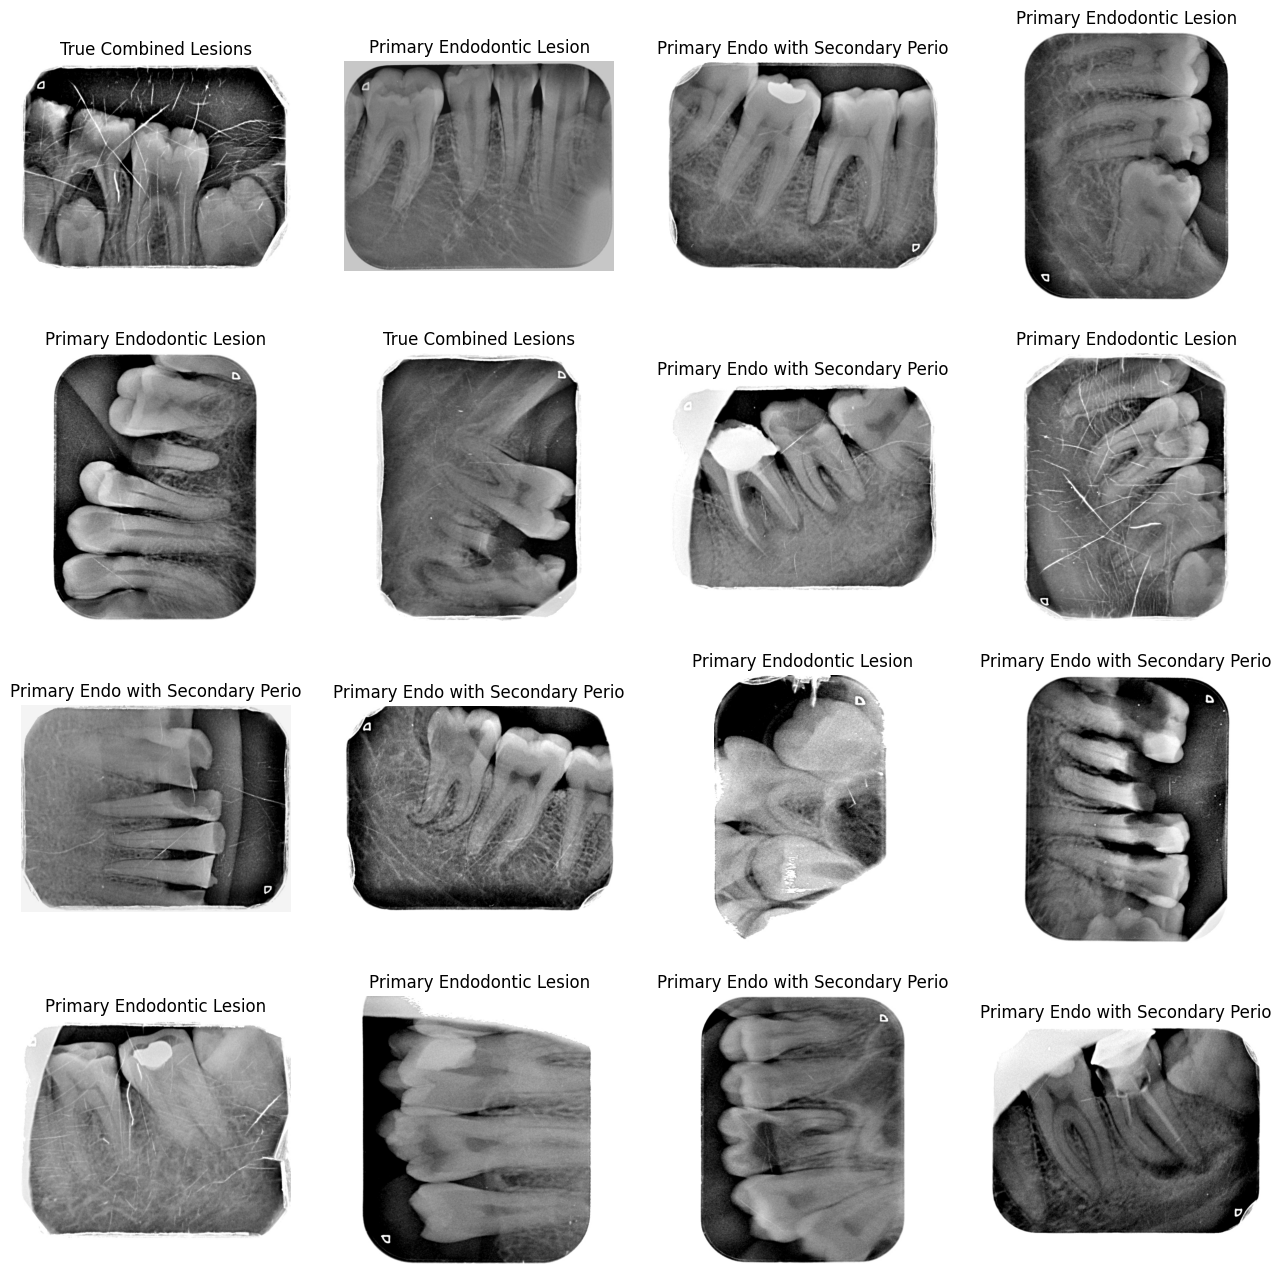

In [ ]:
visualize_samples(train_gen_flow)

#Building Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


# Load MobileNet
base_model = tf.keras.applications.MobileNet(
    weights='imagenet',
    include_top=False,
    pooling = 'avg',
    input_shape=(224, 224,3)
)

for layer in base_model.layers[:-4]:
    layer.trainable = False

model = Sequential([
    base_model,
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
    ])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

model.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 1024)                │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,296,643 (12.58 MB)

 Trainable params: 1,118,403 (4.27 MB)

 Non-trainable params: 2,178,240 (8.31 MB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model_mobilenet.keras', save_best_only=True, monitor='val_loss', mode='min')


history = model.fit(
    train_gen_flow,
    validation_data=valid_gen_flow,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - Recall: 0.2811 - accuracy: 0.4314 - loss: 1.1946 - val_Recall: 0.3841 - val_accuracy: 0.4503 - val_loss: 1.1813 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 644ms/step - Recall: 0.4129 - accuracy: 0.5009 - loss: 1.0866 - val_Recall: 0.3775 - val_accuracy: 0.4106 - val_loss: 1.2029 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 470ms/step - Recall: 0.4869 - accuracy: 0.5896 - loss: 0.8839 - val_Recall: 0.4106 - val_accuracy: 0.4570 - val_loss: 1.1330 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 434ms/step - Recall: 0.5307 - accuracy: 0.6539 - loss: 0.7569 - val_Recall: 0.4636 - val_accuracy: 0.5099 - val_loss: 1.2960 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 543ms/step - Recall: 0.4851 - accuracy: 0.5882 - loss: 0.8861 - val_Recall: 0.4503 - val_accuracy: 0.4901 - val_loss: 1.1147 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 455ms/step - Reca

#Model Evaluation

In [ ]:
loss, accuracy, recall = model.evaluate(test_gen_flow)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - Recall: 0.8052 - accuracy: 0.8122 - loss: 0.5750


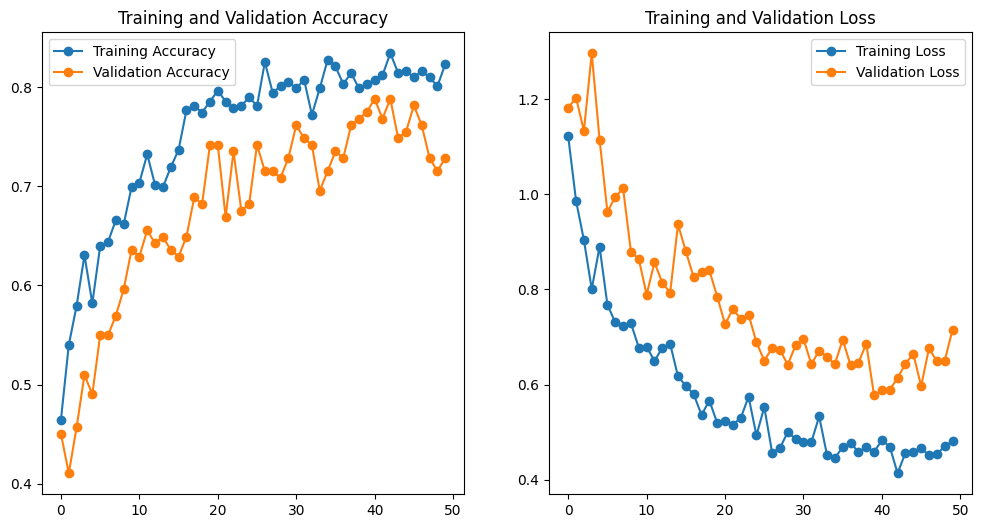

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the function
plot_training_history(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step


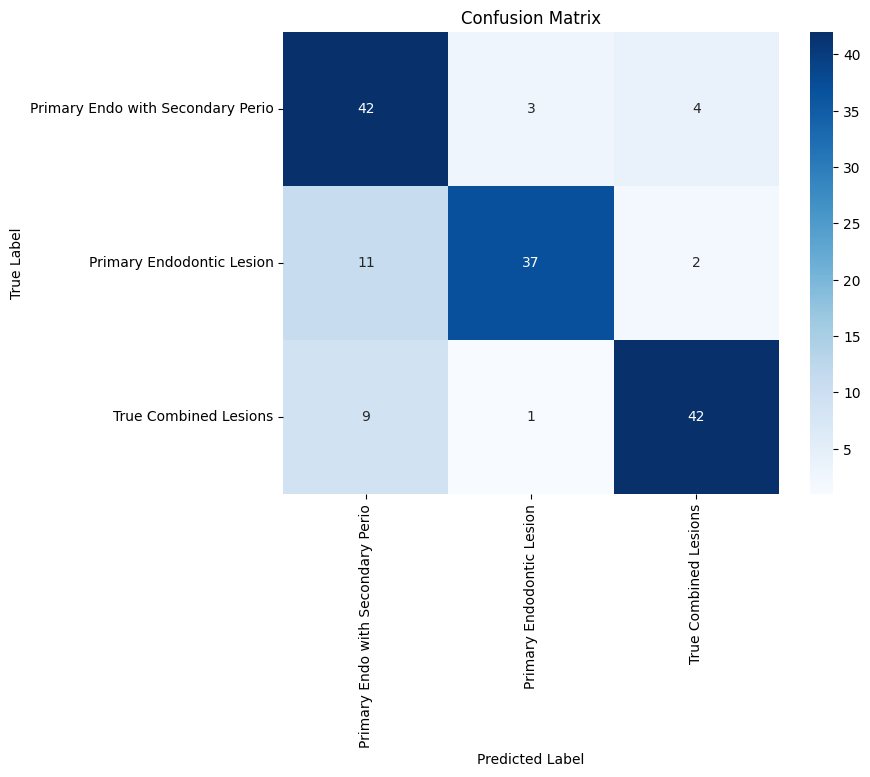

In [ ]:
# prompt: buat confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the validation data
y_pred = model.predict(test_gen_flow)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_gen_flow.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=valid_gen_flow.class_indices,
            yticklabels=valid_gen_flow.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##Klasifikasi Jenis Penyakit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


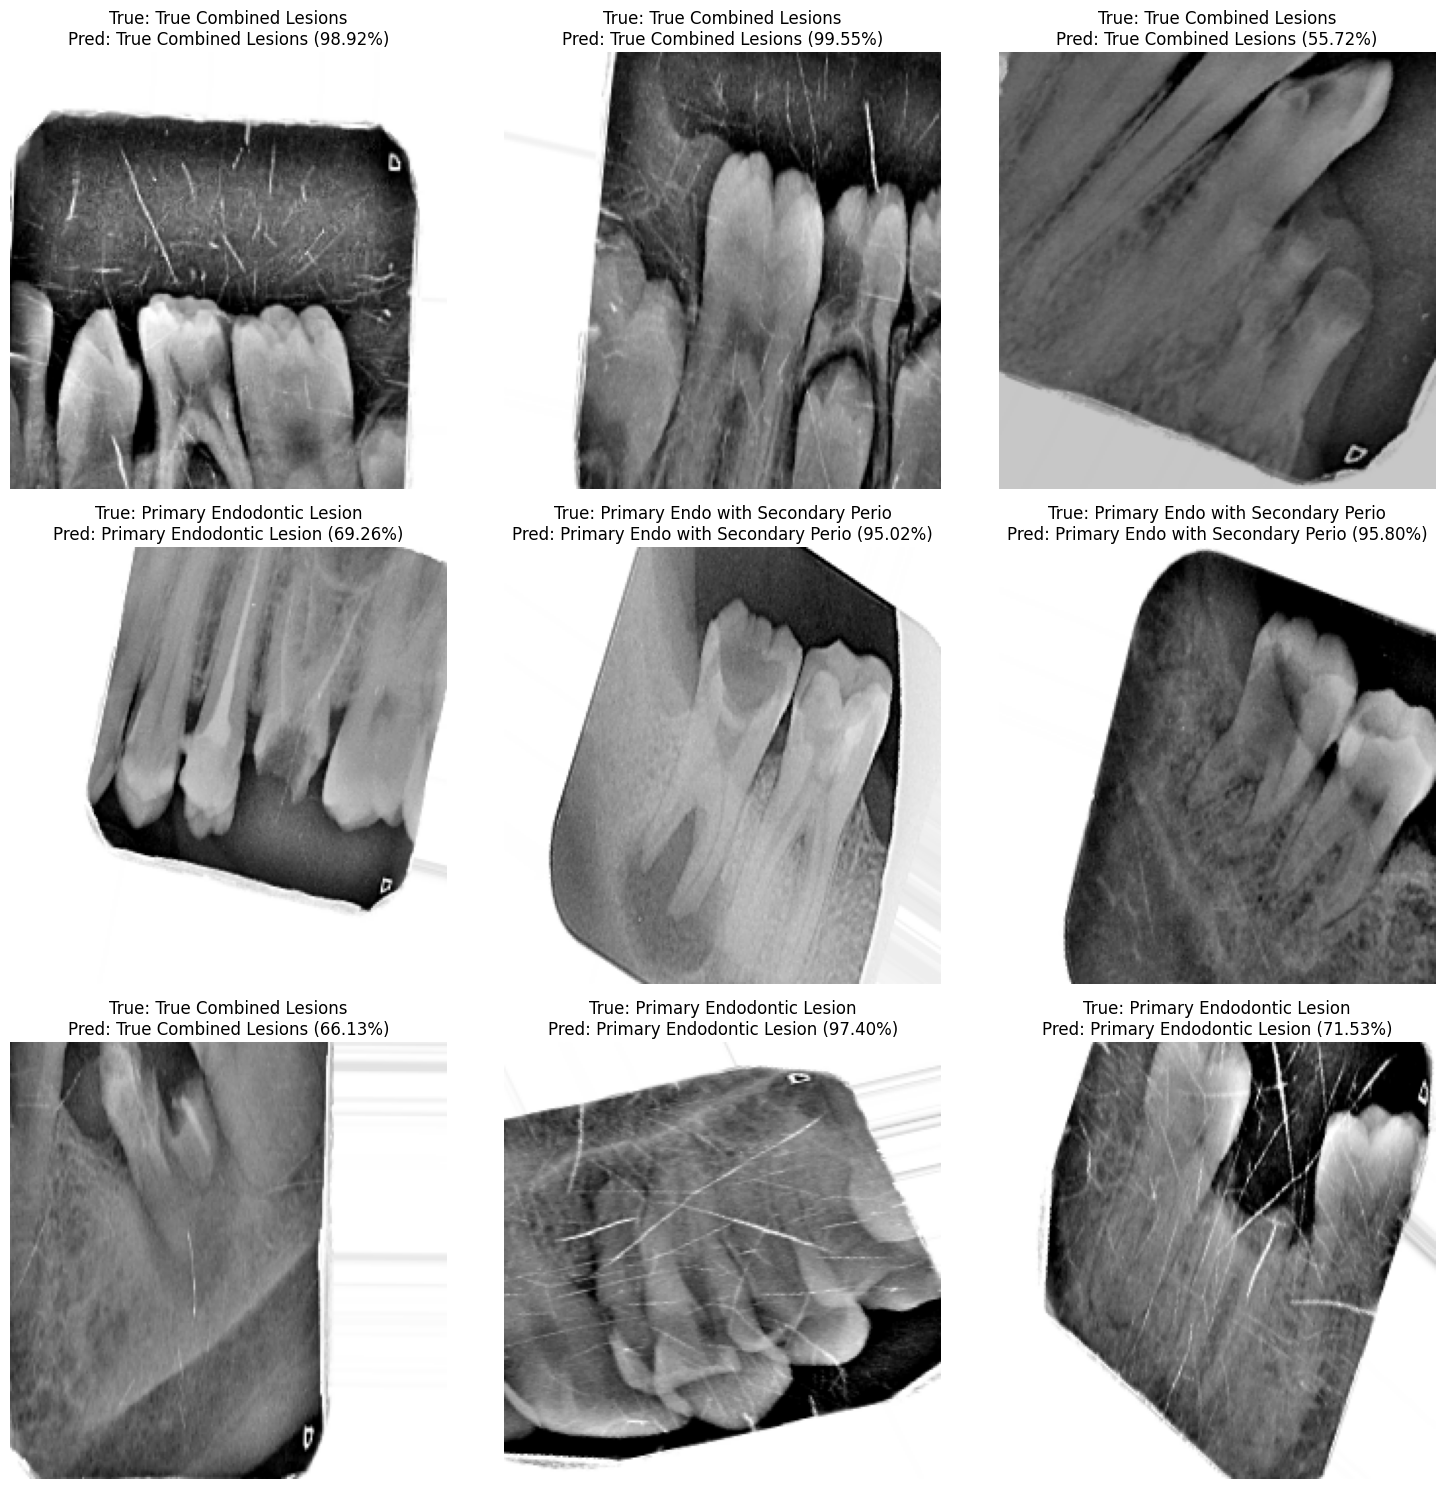

In [ ]:
# Fungsi untuk mengembalikan gambar ke rentang warna asli
def denormalize_image(image):
    image = image.copy()
    image = (image + 1.0) * 127.5  # Mengembalikan preprocessing MobileNet
    image = np.clip(image, 0, 255).astype("uint8")
    return image

# Fungsi untuk memvisualisasikan hasil klasifikasi
def visualize_predictions(model, generator, num_images=9):
    # Pilih batch pertama dari generator validasi
    x_batch, y_batch = next(generator)
    y_true = np.argmax(y_batch, axis=1)

    # Pilih subset untuk divisualisasikan
    selected_indices = np.random.choice(len(x_batch), num_images, replace=False)
    selected_images = x_batch[selected_indices]
    selected_labels = y_true[selected_indices]

    # Prediksi model
    predictions = model.predict(selected_images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Visualisasi
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    class_names = list(generator.class_indices.keys())

    for i, ax in enumerate(axes.flat):
        # Denormalize gambar
        image = denormalize_image(selected_images[i])
        true_label = class_names[selected_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        confidence = np.max(predictions[i]) * 100

        ax.imshow(image)
        ax.set_title(f"True: {true_label}\nPred: {predicted_label} ({confidence:.2f}%)")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi
visualize_predictions(model, valid_gen_flow, num_images=9)
